In [1]:
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from gluonts.torch import DeepAREstimator

import matplotlib.pyplot as plt
import pandas as pd
import torch

import numpy as np
import matplotlib.pyplot as plt
import os


/home/user-prog/.local/lib/python3.11/site-packages/gluonts/json.py:101: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


In [2]:
dirname = os.path.join(os.path.abspath(os.curdir), 'data', 'underwork')

raw_data = {"3":(), "5":(), "8":(), "10":(), "14":(), "15":()}
for v in raw_data:
    tsdf_c = pd.read_csv(os.path.join(os.sep, dirname, v, 'calm_p.csv'))
    tsdf_w = pd.read_csv(os.path.join(os.sep, dirname, v,  'work_p.csv'))
    tsdf_m = pd.read_csv(os.path.join(os.sep, dirname, v, 'meta_p.csv'))
    raw_data[v] = (tsdf_c, tsdf_w, tsdf_m)

In [5]:
data = {"3":(), "5":(), "8":(), "10":(), "14":(), "15":()}

for v in raw_data:
    calm = raw_data[v][0]
    work = raw_data[v][1]
    sex = raw_data[v][2].iloc[0]["values"]
    weight = raw_data[v][2].iloc[1]["values"]
    height = raw_data[v][2].iloc[2]["values"]
    calm["sex"] = sex
    calm["weight"] = weight
    calm["height"] = height
    calm["state"] = 0
    work["sex"] = sex
    work["weight"] = weight
    work["height"] = height
    work["state"] = 1
    data[v] = (calm, work)

In [6]:
validation = {"25":(), "27":()}
for v in validation:
    calm = pd.read_csv(os.path.join(os.sep, dirname, v, 'calm_p.csv'))
    work = pd.read_csv(os.path.join(os.sep, dirname, v,  'work_p.csv'))
    tsdf_m = pd.read_csv(os.path.join(os.sep, dirname, v, 'meta_p.csv'))
    sex = tsdf_m.iloc[0]["values"]
    weight = tsdf_m.iloc[1]["values"]
    height = tsdf_m.iloc[2]["values"]
    calm["sex"] = sex
    calm["weight"] = weight
    calm["height"] = height
    calm["state"] = 0
    work["sex"] = sex
    work["weight"] = weight
    work["height"] = height
    work["state"] = 1
    validation[v] = (calm, work)

In [7]:
ts = pd.DataFrame()

for v in data:
   calm = data[v][0]
   work = data[v][1]
   ts = pd.concat([ts, calm, work], sort=False, axis=0)

In [8]:
ts.index = np.arange(len(ts.index))
ts.index = pd.to_datetime(ts.index)
sec = 1000000000
delta = pd.to_datetime(2 * sec) - pd.to_datetime(sec)
times = [pd.to_datetime(sec)]
for i in range(1, len(ts.index)):
    times += [times[i - 1] + delta]
ts.index = times

In [9]:
pdts_data = PandasDataset(ts, freq='S', target='1')
test_size = 7000
train,test = split(pdts_data, offset=-test_size)

In [10]:
EPOCHS = 5
model = DeepAREstimator(freq='S', prediction_length=test_size, trainer_kwargs={'max_epochs':EPOCHS})

In [11]:
predictor = model.train(train)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/user-prog/.local/lib/python3.11/site-packages/lightning/pytorch/trainer/configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
2024-01-09 19:59:22.964700: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-09 19:59:22.987634: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-09 19:59:23.101361: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-09 19:59:23.1

Epoch 0: |          | 50/? [06:29<00:00,  0.13it/s, v_num=2, train_loss=0.353]

Epoch 0, global step 50: 'train_loss' reached 0.35289 (best 0.35289), saving model to '/home/user-prog/Desktop/timeseries/TimeSeries/lightning_logs/version_2/checkpoints/epoch=0-step=50.ckpt' as top 1


Epoch 1: |          | 50/? [06:22<00:00,  0.13it/s, v_num=2, train_loss=-.707]

Epoch 1, global step 100: 'train_loss' reached -0.70729 (best -0.70729), saving model to '/home/user-prog/Desktop/timeseries/TimeSeries/lightning_logs/version_2/checkpoints/epoch=1-step=100.ckpt' as top 1


Epoch 2: |          | 50/? [10:22<00:00,  0.08it/s, v_num=2, train_loss=-.791]

Epoch 2, global step 150: 'train_loss' reached -0.79059 (best -0.79059), saving model to '/home/user-prog/Desktop/timeseries/TimeSeries/lightning_logs/version_2/checkpoints/epoch=2-step=150.ckpt' as top 1


Epoch 3: |          | 50/? [06:43<00:00,  0.12it/s, v_num=2, train_loss=-1.17]

Epoch 3, global step 200: 'train_loss' reached -1.16539 (best -1.16539), saving model to '/home/user-prog/Desktop/timeseries/TimeSeries/lightning_logs/version_2/checkpoints/epoch=3-step=200.ckpt' as top 1


Epoch 4: |          | 50/? [07:11<00:00,  0.12it/s, v_num=2, train_loss=-1.40]

Epoch 4, global step 250: 'train_loss' reached -1.39788 (best -1.39788), saving model to '/home/user-prog/Desktop/timeseries/TimeSeries/lightning_logs/version_2/checkpoints/epoch=4-step=250.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: |          | 50/? [07:11<00:00,  0.12it/s, v_num=2, train_loss=-1.40]


In [12]:
test = test.generate_instances(prediction_length = test_size, windows=1)
forecast = list(predictor.predict(test.input))

1


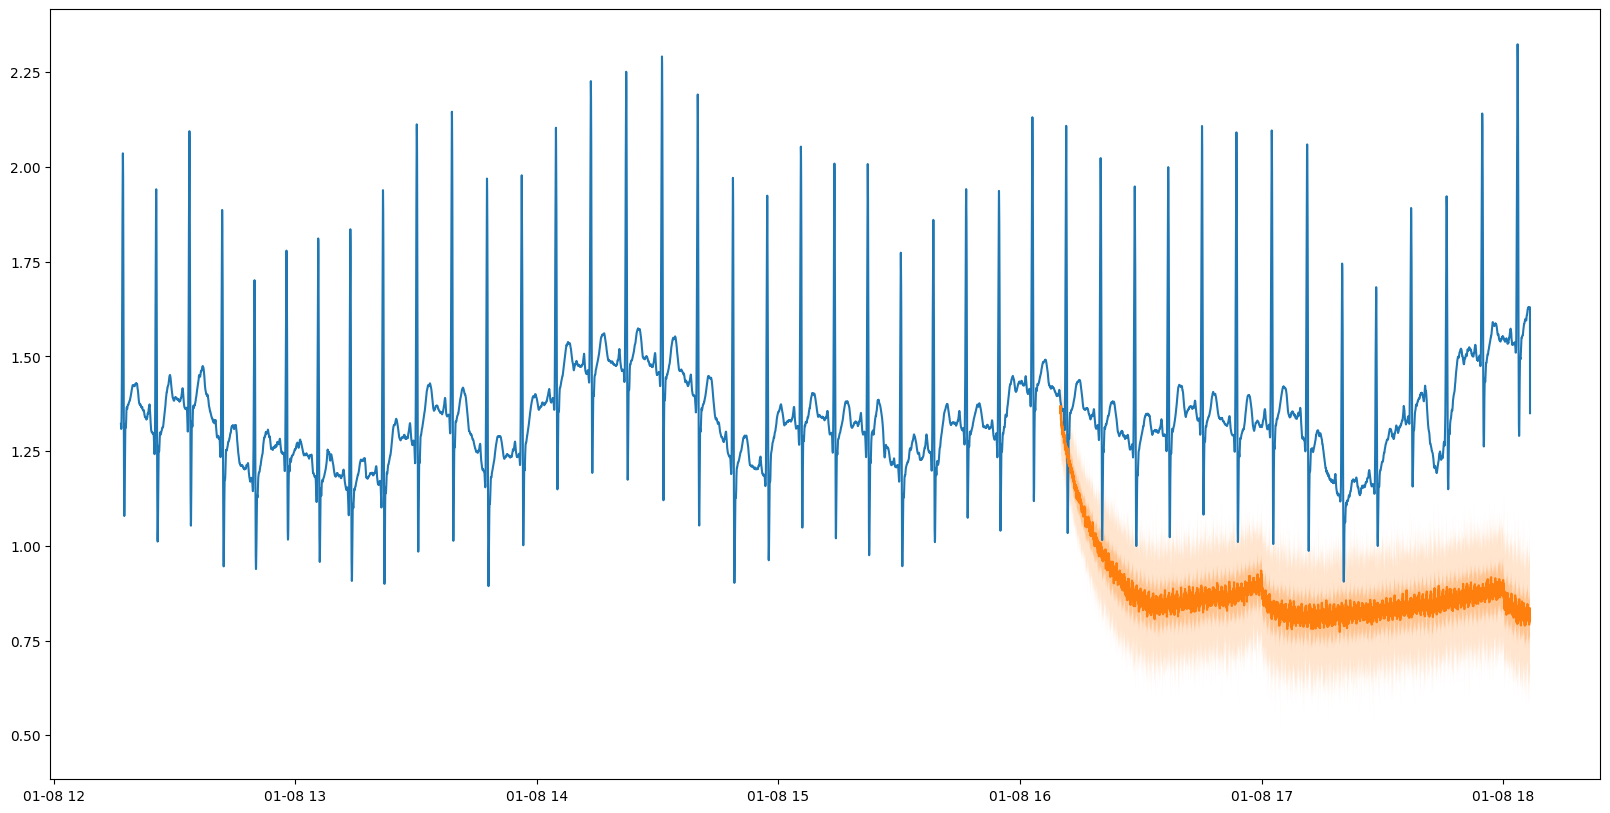

In [13]:
plt.figure(figsize=(20,10))
print(len(forecast))
plt.plot(ts['1'][len(ts['1']) - 3 * test_size:len(ts['1'])])
for fore in forecast:
    fore.plot()

In [14]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
print("RMSE:", np.sqrt(mean_squared_error(ts['1'][len(ts['1']) - len(forecast[0].samples[0]):len(ts['1'])], forecast[0].samples[0])))
print("MAPE:", mean_absolute_percentage_error(ts['1'][len(ts['1']) - len(forecast[0].samples[0]):len(ts['1'])], forecast[0].samples[0]))
print("MAE:", mean_absolute_error(ts['1'][len(ts['1']) - len(forecast[0].samples[0]):len(ts['1'])], forecast[0].samples[0]))
print("R2: ", r2_score(ts['1'][len(ts['1']) - len(forecast[0].samples[0]):len(ts['1'])], forecast[0].samples[0]))

RMSE: 0.5290640495916742
MAPE: 0.3494862243781747
MAE: 0.48494026144642477
R2:  -9.53913808140641
